In [9]:
import os
from matplotlib import pyplot as plt
import numpy as np

In [10]:
import pytesseract

In [11]:
pytesseract.get_tesseract_version()

LooseVersion ('5.0.0-alpha-810-g514a')

In [12]:
import os
# https://stackoverflow.com/a/9728478
def list_files(startpath):
    files_path = []
    for root, dirs, files in os.walk(startpath):
        for indx in range(len(files)):
            files_path.append(root+"/"+files[indx])
    return list(filter(lambda el: el.endswith("JPG"), files_path))

In [13]:
def show_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
home_path = "/media/juan/jc/archivos_represion/Ficheros/"
imgs = list_files(home_path)

In [15]:
len(imgs)

18008

In [16]:
import cv2

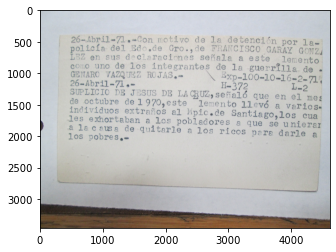

In [30]:
from subprocess import call
indx = 1
call(['xdg-open',imgs[indx]])
image = cv2.imread(imgs[indx])
show_img(image)

# 2

In [8]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged

In [9]:
from crop_imgs import four_point_transform
import numpy as np
import argparse
import cv2


from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2
import imutils

image = cv2.imread(imgs[1])
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 120, 180)
edged = auto_canny(gray)
# show the original image and the edge detected image
print("STEP 1: Edge Detection")
cv2.imshow("Image", image)
cv2.imshow("Edged", edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

STEP 1: Edge Detection


In [11]:
(x,y,w,h) =cv2.boundingRect(edged.copy())

In [12]:
crop_img = image[y:y+h, x:x+w]
cv2.imshow("Image", image)
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

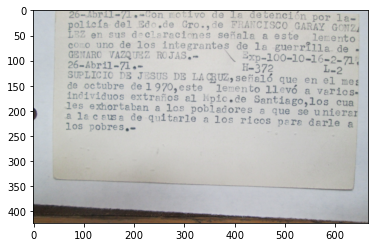

In [16]:
show_img(crop_img)

In [15]:
# https://www.pyimagesearch.com/2018/09/17/opencv-ocr-and-text-recognition-with-tesseract/
# https://ai-facets.org/tesseract-ocr-best-practices/
import pytesseract
config = ("-l spa -load_system_dawg false -load_freq_dawg false ")
text = pytesseract.image_to_string(crop_img, config=config)
print(text)

# Mejorar calidad de la lectura
url: https://tesseract-ocr.github.io/tessdoc/ImproveQuality

In [17]:
from crop_imgs import four_point_transform
import numpy as np
import argparse
import cv2
from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2
import imutils

In [18]:
image = cv2.imread(imgs[1])

In [19]:
image.shape

(3456, 4608, 3)

# Resizing

In [21]:
image = cv2.imread(imgs[1])
image = imutils.resize(image, height = 900)

cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Binarización

In [22]:
# https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY);
image = cv2.medianBlur(image,5)
th3 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

cv2.imshow("threshold", th3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_photo/py_non_local_means/py_non_local_means.html
denoised = cv2.fastNlMeansDenoising(th3,None, 20,7,21)

cv2.imshow("antes", th3)
cv2.imshow("desues", denoised)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Quitar bordes

In [24]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged

In [25]:
edged = auto_canny(image)
(x,y,w,h) =cv2.boundingRect(edged.copy())
crop_img = denoised[y:y+h, x:x+w]


cv2.imshow("antes", denoised)
cv2.imshow("desues", crop_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Adding white border

In [75]:
bordersize = 5
border_img = cv2.copyMakeBorder(
    crop_img,
    top=bordersize,
    bottom=bordersize,
    left=bordersize,
    right=bordersize,
    borderType=cv2.BORDER_CONSTANT,
    value=255
)

cv2.imshow("antes", crop_img)
cv2.imshow("desues", border_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

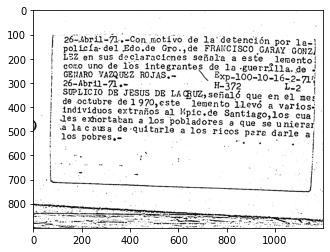

In [76]:
show_img(crop_img)

In [84]:
from pytesseract import Output
config = ("-l spa --psm 1")

text = pytesseract.image_to_string(border_img, config=config)
print(text)

2 ———]—

!
1
!
l
|
i
í
f
|
p

“26-Abril-71-.-Con motivo: de la' detención por la=l
531€E3d£ Edo.de Gro.,de FRANCISCO CAÑAY CoNZ)
=2 en.sus declaracicnes señala a este ¿lemento$
coxo uno de los integrantes de la -guerríilla. de -
GENARO VAZQUEZ ROJAS.- — X Exp-100-10-16-2-71%
26-Abri1-71 .- - H-372 D2 |

- SUPLICIO DE JESUS DE LACRUZ, señaló que en el mes

de octubre de 1970,este “lemento llevó a varios:

“ individuos extraños al Kpic.de Santiago,los cua!

des exmortaban a los pobladores a que sé unierar
a lacawusa de -quitarle a los ricos pera darle aj
los pobres,- - . Te
. — - í

 



In [95]:
def suma(a,b=3, f=1,c=1,d=2):
    return a+b+c+d+f

In [98]:
suma(1,)

9

In [10]:
print(text)

In [20]:
# convert the image to grayscale and flip the foreground
# and background to ensure foreground is now "white" and
# the background is "black"
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
# threshold the image, setting all foreground pixels to
# 255 and all background pixels to 0
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [21]:
# grab the (x, y) coordinates of all pixel values that
# are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all
# coordinates
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]
# the `cv2.minAreaRect` function returns values in the
# range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we
# need to add 90 degrees to the angle
if angle < -45:
	angle = -(90 + angle)
# otherwise, just take the inverse of the angle to make
# it positive
else:
	angle = -angle

In [22]:
# rotate the image to deskew it
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

In [23]:
# draw the correction angle on the image so we can validate it
cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
# show the output image
print("[INFO] angle: {:.3f}".format(angle))
cv2.imshow("Input", image)
cv2.imshow("Rotated", rotated)
cv2.waitKey(0)

[INFO] angle: -0.000


113

In [10]:
img = autocrop_image(imgs[0])

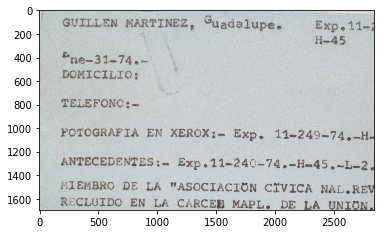

In [11]:
plt.imshow(img)

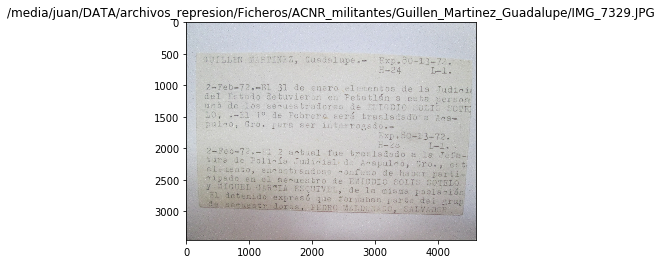

In [61]:
from matplotlib import pyplot as plt
indice_prueba = 1
image = plt.imread(imgs[indice_prueba])
plt.imshow(image)
plt.title(imgs[indice_prueba])
plt.show()

In [71]:
#installation procedure: https://tesseract-ocr.github.io/tessdoc/Home.html
import pytesseract
print(pytesseract.image_to_string(image))

 

GUILLEN MAFTINEZ, Guadalupc. Exp.11-249~74§'

‘ne~31-74.~
DOMICILIO:

TELEFONO:-
FOTOGRAFIA EN XEROX:— EXp. 11-249~74.~H—46.-L~2..

ANTECEDENTES:- Bxp.11—24C~74.-H—45.-L-2.

MIBMBRO DE LA ”ASOCIACION CIVICA NAL.REVOLUCIONARI£F
RLCLUIDO EN LA ChRCEﬂ MAPL. DE LA UNION, GROou.

M ﬁ-.M.,.‘WNW“»..M«W+<WWW

 




Best angle: 1


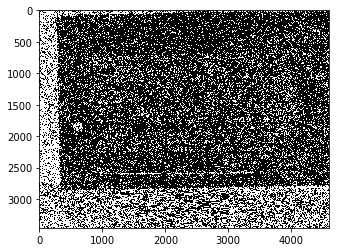

In [56]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
from scipy.ndimage import interpolation as inter
input_file = imgs[indice_prueba]
img = im.open(input_file)
# convert to binary
wd, ht = img.size
pix = np.array(img.convert('1').getdata(), np.uint8)
bin_img = 1 - (pix.reshape((ht, wd)) / 255.0)
plt.imshow(bin_img, cmap='gray')
plt.savefig('binary.png')
def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score
delta = 1
limit = 5
angles = np.arange(-limit, limit+delta, delta)
scores = []
for angle in angles:
    hist, score = find_score(bin_img, angle)
    scores.append(score)
best_score = max(scores)
best_angle = angles[scores.index(best_score)]
print('Best angle: {}'.format(best_angle))
# correct skew
data = inter.rotate(img, best_angle, reshape=False, order=0)
img_nueva = im.fromarray((255 * data).astype("uint8")).convert("RGB")

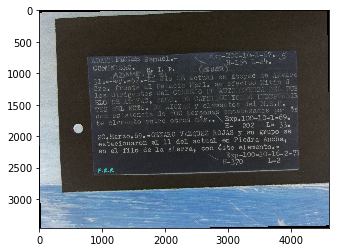

In [59]:
plt.imshow(img_nueva)
plt.show()